<h1> FIFA 2020 Analysis</h1>

The project aims to highlight three significant aspects as per the Sofifa EA data. It has been divided into 3 parts: A, B and C.



In [ ]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import zipfile

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 

#import warnings
#warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<div style = "background: lightblue;color:black" class="alert alert-block alert-danger" >

<h2>Part A - Ranking the Players</h2>


Used data from FIFA 19. Predicted the Overall (OVR) skill Statistic for players in the FIFA 20 Edition. Trained on all players from FIFA 19.


* Test Set: Players from the following Clubs:
**FC Barcelona, FC Bayern München, Real Madrid, Paris Saint-Germain, Juventus, Manchester City, Liverpool FC**
    
</div>

In [ ]:
zf=zipfile.ZipFile('fifadataset.zip')
df_19=pd.read_csv(zf.open('players_19.csv'))
df_20=pd.read_csv(zf.open('players_20.csv'))
# print(list(df_19.columns))

In [ ]:
#considering the specific columns to predict OVR
skillset=['age','international_reputation','pace','shooting','passing','defending','physic','gk_speed','gk_positioning', 'attacking_crossing','attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

In [ ]:
#cleaning the training data
df_19['player_positions']=df_19['player_positions'].str.split(',').str[0] #delimit by , and considering only first
df_train=df_19.drop(columns=['sofifa_id', 'player_url', 'short_name','long_name', 'potential', 'real_face'],axis=1) #dropping some columns
#df_train.head()

In [ ]:
df_20['player_positions']=df_20['player_positions'].str.split(',').str[0]
df_20['player_positions']=df_19['player_positions']
test_club=['FC Barcelona','FC Bayern München','Real Madrid','Paris Saint-Germain','Juventus','Manchester City','Liverpool']

df_test=df_20[df_20['club'].isin(test_club)].drop(columns=['sofifa_id', 'player_url', 'short_name','long_name', 'potential', 'real_face'],axis=1)
#df_test.head(100)

In [ ]:
#defining a helper function to convert objects like '76+3' into 'integers'
import string
def str_int(s):
    if s != 'nan':
        return eval(s) #eval(s) evaluates on the arithmetic operator
    else:    
        return s #should ideally return all 'nan' values since only 2 categories of data existsal(s) #eval(s) evaluates on the arithmetic operator

In [ ]:
#applying the above helper function to the test and train set
skills_train=df_train[skillset]
skills_train=skills_train.astype(str).applymap(str_int)
#skills_train.head(310)
skills_test=df_test[skillset]
skills_test=skills_test.astype(str).applymap(str_int)
#skills_test.head(310)

In [ ]:
#replacing the blanks with mean of the columns
imputer=SimpleImputer(strategy='mean')
skills_train_new=pd.DataFrame(imputer.fit_transform(skills_train))
skills_train_new.columns=skills_train.columns
skills_test_new=pd.DataFrame(imputer.fit_transform(skills_test))
skills_test_new.columns=skills_test.columns
#skills_train_new.info()

In [ ]:
#specifying dependent & independent variables
y_train=df_train.overall
y_test=df_test.overall
x_test=skills_test_new
x_train=skills_train_new

In [ ]:
#defining a model
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
print('MSE(Multi Reg)',MSE)

MSE(Multi Reg) 21.010579232112935


In [ ]:
#creating a new dataframe with predicted OVR
new_test_df=df_20[df_20['club'].isin(test_club)].copy()
new_test_df['predicted_overall']=y_pred
final_data=new_test_df.round(0).astype({'predicted_overall': 'int32'})

In [ ]:
#final_data.head()

In [ ]:
final_data[['predicted_overall']].idxmax() #index of the maximum value of the predicted overall column

predicted_overall    1
dtype: int64

In [ ]:
final_data['long_name'][1] #value corresponding to idxmax

'Cristiano Ronaldo dos Santos Aveiro'

In [ ]:
print ('The best player in the world is:', final_data['long_name'][final_data[['predicted_overall']].idxmax()][1])

The best player in the world is: Cristiano Ronaldo dos Santos Aveiro


<div style = "background: lightgreen ;color:black" class="alert alert-block alert-danger" >
<h3>Cristiano Ronaldo is the best player in the world, as per the analysis, when he plays as Center Forward.</h3>
<I>A peculiar catch was noticed when we included International Reputation to predict Overall Ranking, in which case Ronaldo's ranking was predicted to be a whooping 100! This does seem a little unrealistic but solidifies his stance.</I>

### Plots of OVR for each Club in Test Set

In [ ]:
#segregating predicted OVR for each club of the test set
def club(x):
    return final_data[final_data['club']==x][['predicted_overall']]

In [ ]:
#importing to add Club Logo Images in each Plot
#from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
#import matplotlib.image as mpimg


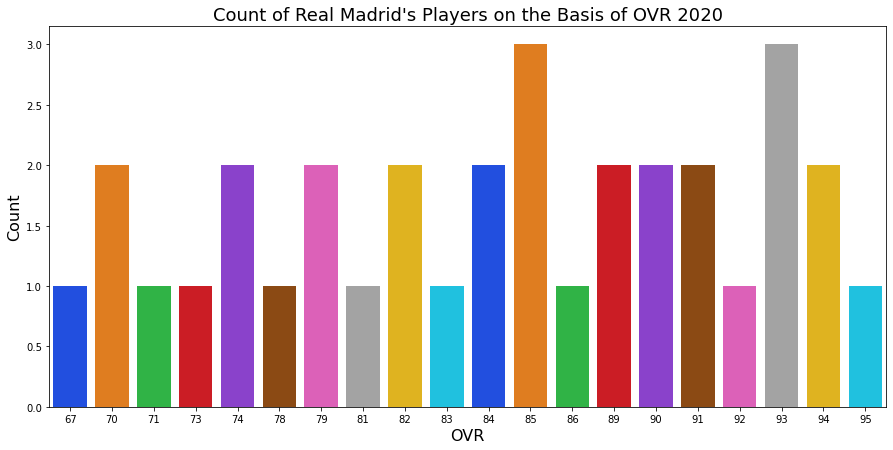

In [ ]:
realmadrid=club('Real Madrid')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=realmadrid, palette='bright')
ax.set_title(label='Count of Real Madrid\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
# realmad = mpimg.imread('realmadrid.PNG')

# imagebox = OffsetImage(realmad, zoom=0.5)

# ab = AnnotationBbox(imagebox, (0.58,2.63))

# ax.add_artist(ab)

plt.show()

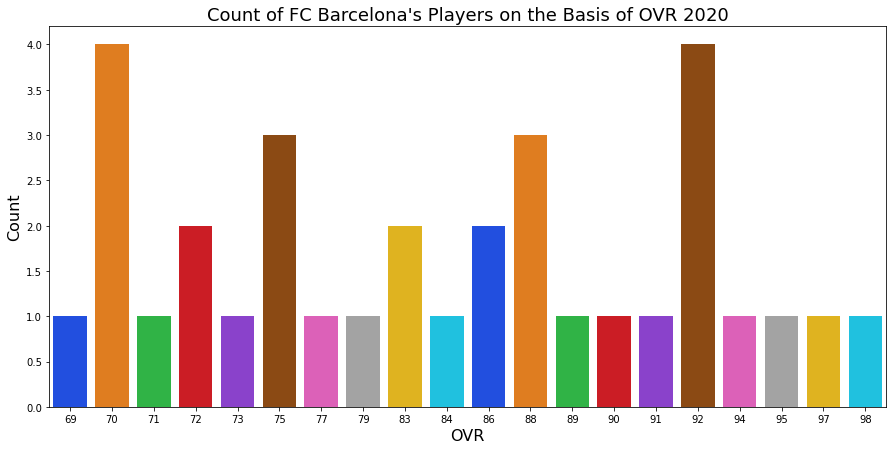

In [ ]:
fcbarcelona=club('FC Barcelona')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=fcbarcelona, palette='bright')
ax.set_title(label='Count of FC Barcelona\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

# fcbarca= mpimg.imread('fcbarca.png')

# imagebox = OffsetImage(fcbarca, zoom=0.4)

# ab = AnnotationBbox(imagebox, (18.3, 3.65))

# ax.add_artist(ab)

plt.show()

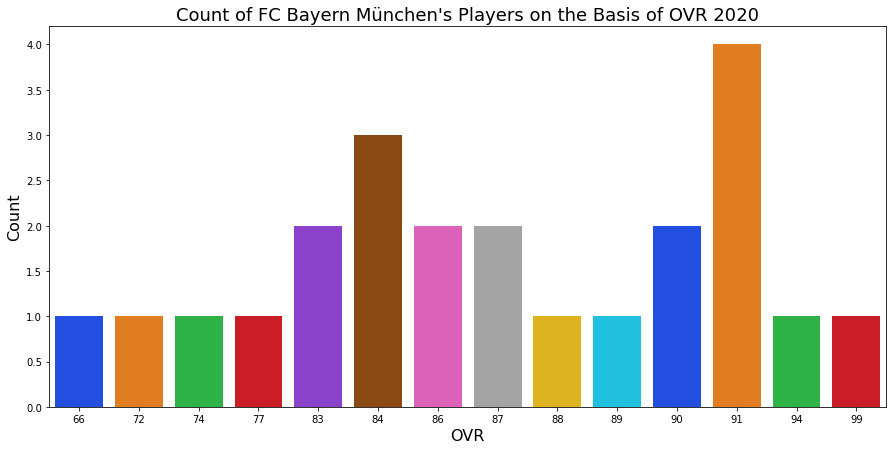

In [ ]:
fcbayernmunchen=club('FC Bayern München')

plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=fcbayernmunchen, palette='bright')
ax.set_title(label='Count of FC Bayern München\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
# fcbayernm = mpimg.imread('fcbayernm.png')

# imagebox = OffsetImage(fcbayernm, zoom=0.5)

# ab = AnnotationBbox(imagebox, (0.5, 3.54))

# ax.add_artist(ab)
plt.show()


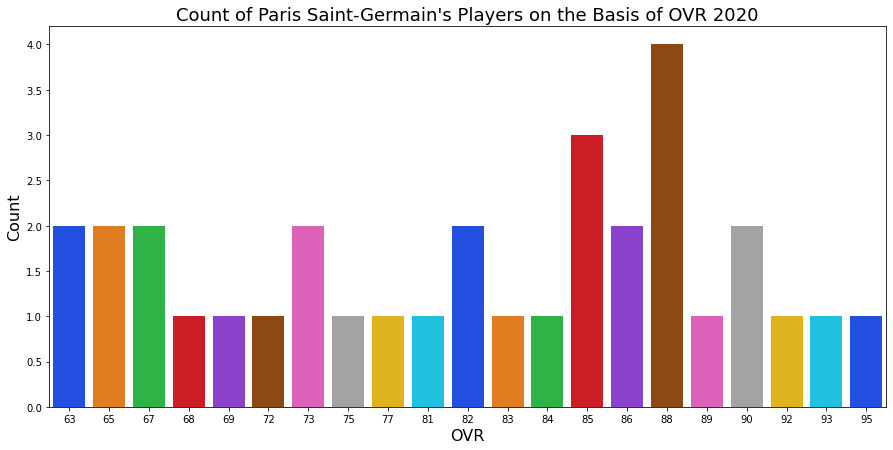

In [ ]:
parissaintgerm=club('Paris Saint-Germain')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=parissaintgerm, palette='bright')
ax.set_title(label='Count of Paris Saint-Germain\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
# paris = mpimg.imread('paris.png')

# imagebox = OffsetImage(paris, zoom=0.5)

# ab = AnnotationBbox(imagebox, (0.98, 3.54))

# ax.add_artist(ab)
plt.show()

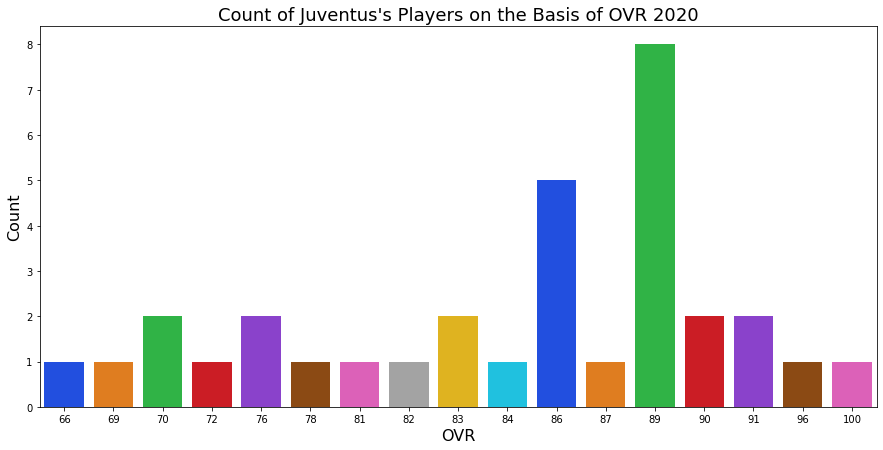

In [ ]:
Juventus=club('Juventus')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=Juventus, palette='bright')
ax.set_title(label='Count of Juventus\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
# juventus = mpimg.imread('juventus.PNG')

# imagebox = OffsetImage(juventus, zoom=0.3)

# ab = AnnotationBbox(imagebox, (0.35, 6.62))

# ax.add_artist(ab)
plt.show()

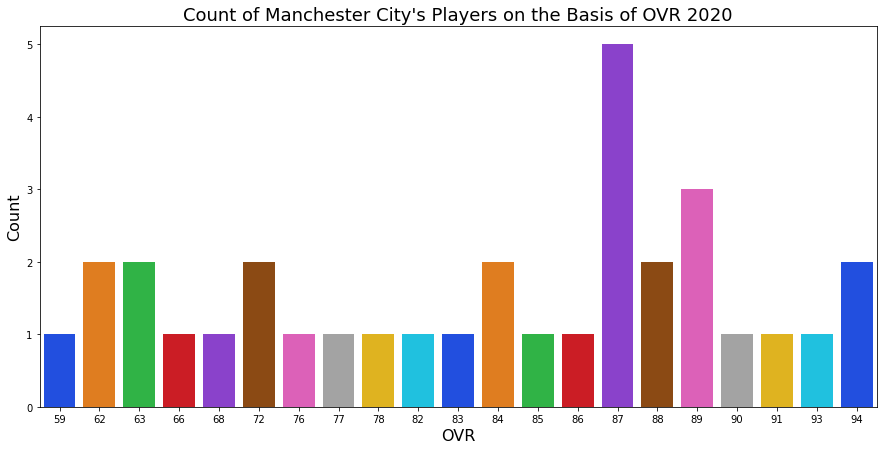

In [ ]:
manchestercity=club('Manchester City')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=manchestercity, palette='bright')
ax.set_title(label='Count of Manchester City\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

# manc = mpimg.imread('manc.png')

# imagebox = OffsetImage(manc, zoom=0.09)

# ab = AnnotationBbox(imagebox, (1, 4.45))

# ax.add_artist(ab)
plt.show()

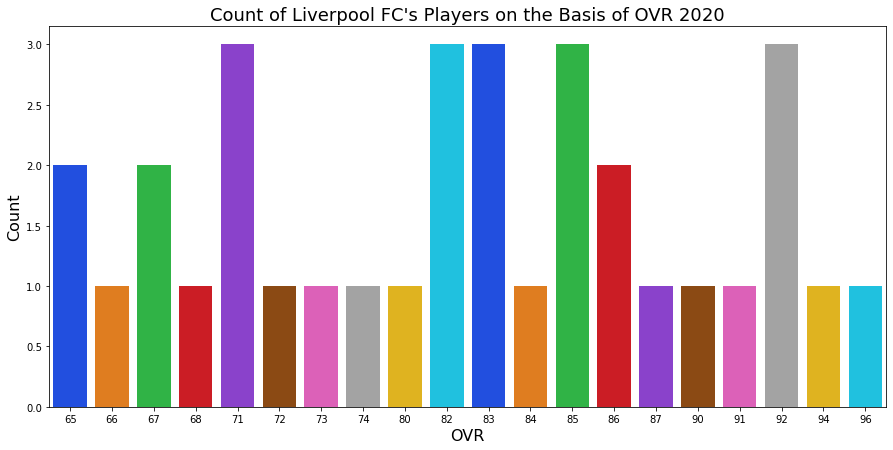

In [ ]:
liverpool=club('Liverpool')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=liverpool, palette='bright')
ax.set_title(label='Count of Liverpool FC\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

# livp = mpimg.imread('livp.png')

# imagebox = OffsetImage(livp, zoom=0.3)

# ab = AnnotationBbox(imagebox, (1.02, 2.63))

# ax.add_artist(ab)

plt.show()

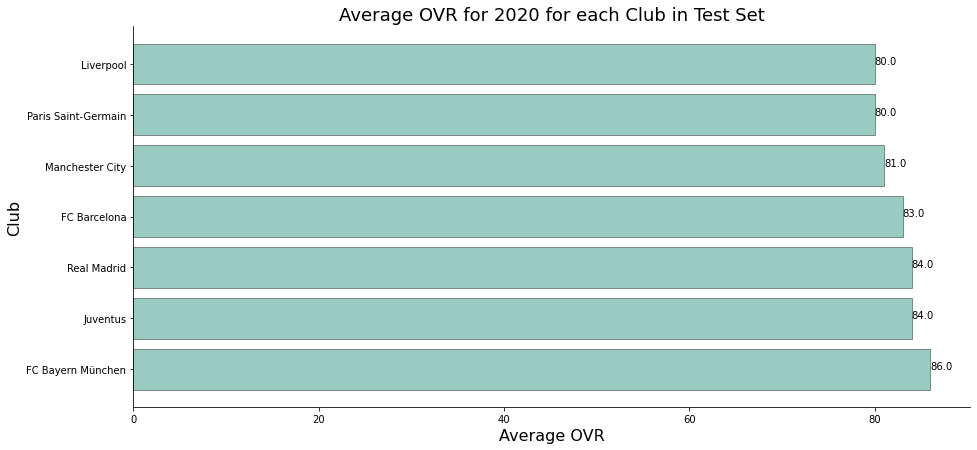

In [ ]:
#plotting average OVR of all Test set clubs
avg_real=round(realmadrid.mean(),0)[0]
avg_fcbarca=round(fcbarcelona.mean(),0)[0]
avg_bayernm=round(fcbayernmunchen.mean(),0)[0]
avg_paris=round(parissaintgerm.mean(),0)[0]
avg_juventus=round(Juventus.mean(),0)[0]
avg_manc=round(manchestercity.mean(),0)[0]
avg_livp=round(liverpool.mean(),0)[0]

average_OVR=[avg_bayernm,avg_juventus,avg_real,avg_fcbarca,avg_manc,avg_paris,avg_livp]
club_test=['FC Bayern München','Juventus','Real Madrid','FC Barcelona','Manchester City','Paris Saint-Germain','Liverpool']

fig,ax=plt.subplots(figsize= (15,7))
ax.barh(club_test,average_OVR,alpha=0.4, color = '#007D66',edgecolor='k')
ax.set_xlabel('Average OVR',fontsize=16)
ax.set_ylabel('Club',fontsize=16)
ax.set_title(label='Average OVR for 2020 for each Club in Test Set', fontsize=18)
for index, value in enumerate(average_OVR):
    ax.text(value, index, str(value))
sns.despine()

<div style = "background: #98FB98 ;color:black" class="alert alert-block alert-danger" >
    
*Although the best player (Ronaldo) is from Juventus, however, FC Bayern München has the highest average OVR. The player with the second highest predicted OVR, Manuel Neuer belongs to this team, and the third highest, Lionel Messi is in FC Barcelona.*
    
</div>

<div style = "background: lightblue;color:black" class="alert alert-block alert-danger" >
    
<h2>Part B - Classifying player position </h2> 


Trained on data from FIFA 19. Predicted the player_position variable using other skill statistics for players in the FIFA 20 Edition. Trained on all players from FIFA 19. 


</div>

In [ ]:
df_1 = pd.read_csv(zf.open('players_19.csv'))
#df_1.head()                                     # df_1 is the original dataset of players_19

In [ ]:
df = df_1.drop(['sofifa_id', 'player_url', 'long_name', 'short_name', 'wage_eur', 'real_face'], axis = 1)

In [ ]:
#print(df['player_positions'].isnull().any())      # Checking for NULL values in player_positions
#df[['player_positions']].head()

In [ ]:
# Here we are selecting only the first position of the player and discarding multiple positions(if any).
for i in range(len(df['player_positions'].values)):
    if(len(df['player_positions'][i].split(',')))>1:
        df['player_positions'][i] = df['player_positions'][i].split(',')[0]

       

<ipython-input-1-bbb193786c9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_positions'][i] = df['player_positions'][i].split(',')[0]


In [ ]:
#df[['player_positions']]

In [ ]:
d={}                                                                
df["player_positions"] = df["player_positions"].astype('category') 
df["player_positions_cat"] = df["player_positions"].cat.codes       ### Encoding the positions of players into integers
for i in range(len(df['player_positions'])):
    d[df['player_positions'][i]] = df['player_positions_cat'][i]                                                           

In [ ]:
#df['player_positions_cat'].unique()

In [ ]:
df = df.drop(['player_positions'], axis = 1)      # Dropping column of player_positions values of type stringsf player_positions values of type stringsf player_positions values of type stringsf player_positions values of type stringsf player_positions values of type stringsf player_positions values of type stringsf player_positions values of type stringsf player_positions values of type stringsf player_positions values of type stringsf player_positions values of type strings

In [ ]:
#df.head()

In [ ]:
X = df[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'international_reputation', 'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
y = df['player_positions_cat']

In [ ]:
#X.isnull().any()           # Checking for NULL values in the features().any()           # Checking for NULL values in the features().any()           # Checking for NULL values in the features().any()           # Checking for NULL values in the features().any()           # Checking for NULL values in the features().any()           # Checking for NULL values in the features().any()           # Checking for NULL values in the features().any()           # Checking for NULL values in the features().any()           # Checking for NULL values in the features().any()           # Checking for NULL values in the features

In [ ]:
#X.dtypes    # Checking data types of features

In [ ]:
#X.head()

In [ ]:
cols = X.select_dtypes(exclude=['float', 'int']).columns    # Converting features into floats for training the model.
X[cols] = X[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

/usr/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
#X.dtypes

In [ ]:
for col in X.columns:
    X[col] = X[col].fillna(X[col].median())      ### Replacing null values with the median of columns.
#X.head()

<ipython-input-1-f015bb8740a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(X[col].median())      ### Replacing null values with the median of columns.


In [ ]:
df_test = pd.read_csv(zf.open('players_20.csv'))
#df_test.head()

In [ ]:
df_test = df_test.drop(['sofifa_id', 'player_url', 'long_name', 'short_name', 'wage_eur', 'real_face'], axis = 1)

In [ ]:
# Here we are selecting only the first position of the player and discarding multiple positions(if any).
for i in range(len(df_test['player_positions'].values)):
    if(len(df_test['player_positions'][i].split(',')))>1:
        df_test['player_positions'][i] = df_test['player_positions'][i].split(',')[0]
       

<ipython-input-1-0f66e8a2cd86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['player_positions'][i] = df_test['player_positions'][i].split(',')[0]


In [ ]:
df_test["player_positions"] = df_test["player_positions"].astype('category')
df_test["player_positions_cat"] = df_test["player_positions"].cat.codes

In [ ]:
df_test = df_test.drop(['player_positions'], axis = 1)

In [ ]:
X_test = df_test[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'international_reputation', 'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
y_test = df_test['player_positions_cat']

In [ ]:
cols = X_test.select_dtypes(exclude=['float', 'int']).columns
X_test[cols] = X_test[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [ ]:
for col in X.columns:
    X_test[col] = X_test[col].fillna(X_test[col].median())
#X_test.head()

<ipython-input-1-a635464c8bc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].fillna(X_test[col].median())


In [ ]:
A=[]                                              # Finding good value of C to fit our model to the data.
for c in range(1,100,1):      
    model = LogisticRegression(C = c)
    model.fit(X,y)
    y_pred_test1 = model.predict(X_test)
    A.append(accuracy_score(y_test, y_pred_test1))


/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

Text(0, 0.5, 'Accuracy Score')

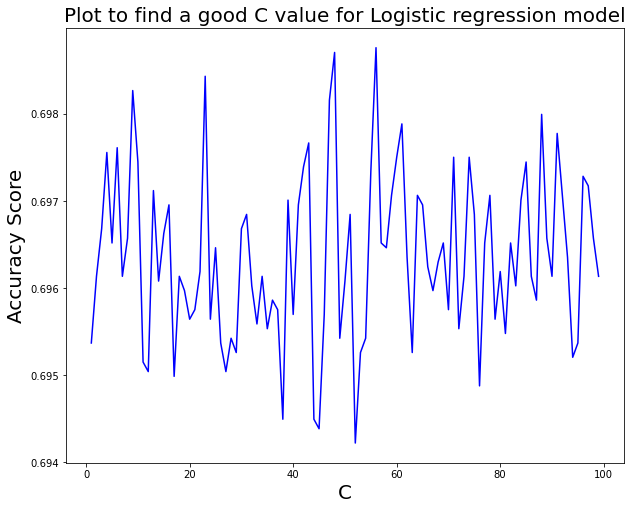

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,100,1), A, c='b')
plt.title('Plot to find a good C value for Logistic regression model', size = 20)
plt.xlabel('C', size = 20)
plt.ylabel('Accuracy Score', size = 20)

In [ ]:
model = LogisticRegression(C = 56)
model.fit(X,y)

/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=56)

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
print('The Classification Accuracy of the model =',accuracy_score(y_test, y_pred_test))

The Classification Accuracy of the model = 0.698763540868804


In [ ]:
def GetKey(val):
    for key, value in d.items():         # A function to get the keys of a dictionary whose values are known.
        if val == value:
            return key

In [ ]:
positions_test=[]                  # Defining two lists to store the player positions
positions_pred=[]
#print('Ground Truth  Prediction')
for i,j in zip(y_pred_test, y_test):  
    positions_test.append(GetKey(j))
    positions_pred.append(GetKey(i))
    #print(GetKey(i)+ '               '+ GetKey(j))
    

Text(0.5, 0, 'Positions')

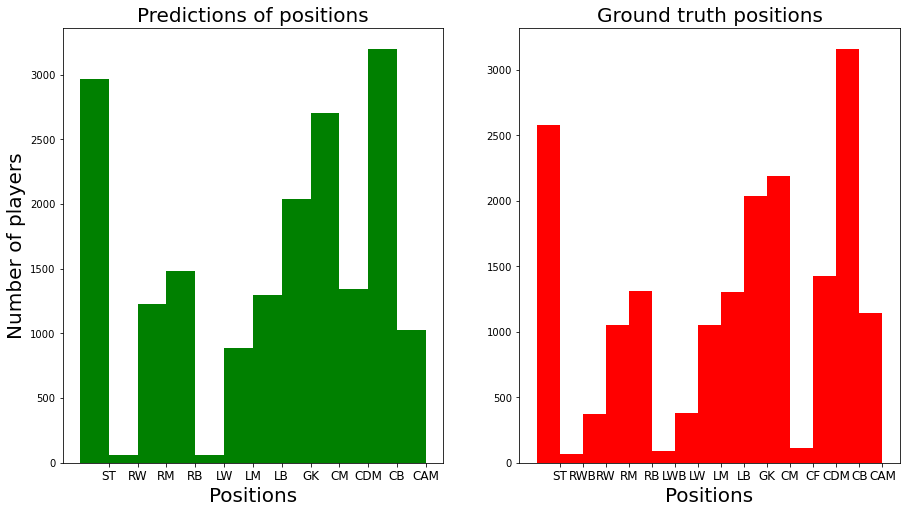

In [ ]:
from collections import Counter
counts_pred = Counter(positions_pred)

labels1, heights1 = zip(*sorted(((k, v) for k, v in counts_pred.items()), reverse=True))
left1 = np.arange(len(heights1))
fig, ax = plt.subplots(1, 2)
ax[0].bar(left1, heights1, 1, color = 'g')
ax[0].set_xticks(left1 + 0.5)
ax[0].set_xticklabels(labels1,  fontsize='large')
ax[0].set_title('Predictions of positions', size = 20)
ax[0].set_xlabel('Positions', size = 20)
ax[0].set_ylabel('Number of players', size = 20)

counts = Counter(positions_test)

labels2, heights2 = zip(*sorted(((k, v) for k, v in counts.items()), reverse=True))
fig.set_figheight(8)
fig.set_figwidth(15)
left2 = np.arange(len(heights2))
ax[1].bar(left2, heights2, 1, color='r')
ax[1].set_xticks(left2 + 0.5)
ax[1].set_xticklabels(labels2,  fontsize='large')
ax[1].set_title('Ground truth positions', size = 20)
ax[1].set_xlabel('Positions', size = 20)

<div style = "background: #98FB98 ;color:black" class="alert alert-block alert-danger" >
    
*We can observe that the predictions are fairly close to the ground truth positions of players in the test set.*
    
</div>

In [ ]:
 # Considering RB, LB, CB, to be professional defenders and CF, ST to be forwards 
#print('Unique position of players')
#print(d)

In [ ]:
#df_1.head()   ### The players_19 data

In [ ]:
df_test_1 = pd.read_csv(zf.open('players_20.csv'))
#df_test_1.head()

### Collecting all the professional defending players data 

In [ ]:
df_RB = df_1[df_1['player_positions'] == 'RB']
df_LB = df_1[df_1['player_positions'] == 'LB']  
df_CB = df_1[df_1['player_positions'] == 'CB']

In [ ]:
RB_players = df_RB['sofifa_id'].values
LB_players = df_LB['sofifa_id'].values       # Collecting the unique sofifa ID's of players
CB_players = df_CB['sofifa_id'].values

### Collecting Forward players data

In [ ]:
df_ST_test = df_test_1[df_test_1['player_positions'] == 'ST']
df_CF_test = df_test_1[df_test_1['player_positions'] == 'CF']

### Observing if any professional defender in 2019 has changed to forward position in 2020

In [ ]:
RBtoCF=[]
LBtoCF=[]
CBtoCF=[]
RBtoST=[]
LBtoST=[]
CBtoST=[]
for i in df_CF_test['sofifa_id'].values:
    if(i in df_RB['sofifa_id']):
        RBtoCF.append(i)
    if(i in df_LB['sofifa_id']):
        LBtoCF.append(i)
    if(i in df_CB['sofifa_id']):
        CBtoCF.append(i)
        
for i in df_ST_test['sofifa_id'].values:
    if(i in df_RB['sofifa_id']):
        RBtoST.append(i)
    if(i in df_LB['sofifa_id']):
        LBtoST.append(i)
    if(i in df_CB['sofifa_id']):
        RBtoST.append(i)
        

In [ ]:
print('Number of players from RB to CF = ',len(RBtoCF))
print('Number of players from LB to CF = ',len(LBtoCF))
print('Number of players from CB to CF = ',len(CBtoCF))
print('Number of players from RB to ST = ',len(RBtoST))
print('Number of players from LB to ST = ',len(LBtoST))
print('Number of players from CB to ST = ',len(CBtoST))

Number of players from RB to CF =  0
Number of players from LB to CF =  0
Number of players from CB to CF =  0
Number of players from RB to ST =  0
Number of players from LB to ST =  0
Number of players from CB to ST =  0


<div style = "background: lightgreen ;color:black" class="alert alert-block alert-danger" >

## Therefore, we can see that no defender has converted to a forward position. 
    
</div>

<div style = "background: lightblue;color:black" class="alert alert-block alert-danger" >
    
<h2>Part C - Which Club has the Best Staff?  </h2>

1. Analyzed changes in player stats and value from last five years. Ranked the clubs according to best increase in statistics of a player


#### Details :

* The test set is as follows for this part (Division 1 European League):

    * Leagues to be considered: 

        * Premier League - English Premier League
        * Bundesliga German 1. Bundesliga
        * Ligue 1 French Ligue 1
        * La Liga Spain Primera Division
        * Serie A Italian Serie A
 
</div>

In [ ]:
df_teams=pd.read_csv(zf.open('teams_and_leagues.csv'))
leagues=['English Premier League ','German 1. Bundesliga ','French Ligue 1 ','Spain Primera Division ','Italian Serie A ']

df_teams1=df_teams[df_teams['league_name'].isin(leagues)]
#print(df_teams1.shape)
#df_teams1.head()

In [ ]:
df_16=pd.read_csv(zf.open('players_16.csv'))
df_17=pd.read_csv(zf.open('players_17.csv'))
df_18=pd.read_csv(zf.open('players_18.csv'))
df_19=pd.read_csv(zf.open('players_19.csv'))
df_20=pd.read_csv(zf.open('players_20.csv'))
df_teams2=pd.read_csv('teams2.csv')

In [ ]:
# Taking into consideration only the players from the datasets
# that played in the Division 1 European League 

team_playing=list(df_teams2['team_name'].values)


In [ ]:
df_16_final= pd.DataFrame() 
df_16['played']=0

for i in team_playing:
    for j in range(len(df_16)):
        if i==df_16.iloc[j]['club']:
            df_16.iloc[j, df_16.columns.get_loc('played')]=1
            
df_16_final= df_16[df_16.played == 1]
            


In [ ]:
df_17_final= pd.DataFrame() 
df_17['played']=0

for i in team_playing:
    for j in range(len(df_17)):
        if i==df_17.iloc[j]['club']:
            df_17.iloc[j, df_17.columns.get_loc('played')]=1
            

df_17_final= df_17[df_17.played == 1]


In [ ]:
df_18_final= pd.DataFrame() 
df_18['played']=0
for i in team_playing:
    for j in range(len(df_18)):
        if i==df_18.iloc[j]['club']:
            df_18.iloc[j, df_18.columns.get_loc('played')]=1
            

df_18_final= df_18[df_18.played == 1]

In [ ]:
df_19_final= pd.DataFrame() 
df_19['played']=0
for i in team_playing:
    for j in range(len(df_19)):
        if i==df_19.iloc[j]['club']:
            df_19.iloc[j, df_19.columns.get_loc('played')]=1
            

df_19_final= df_19[df_19.played == 1]
            



In [ ]:
df_20_final= pd.DataFrame() 
df_20['played']=0
for i in team_playing:
    for j in range(len(df_20)):
        if i==df_20.iloc[j]['club']:
            df_20.iloc[j, df_20.columns.get_loc('played')]=1
            

df_20_final= df_20[df_20.played == 1]

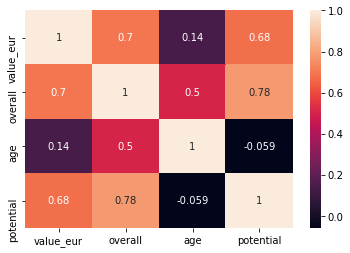

In [ ]:
# Finding the correlation between variables to pick one as the response
corrMatrix = df_16_final[['value_eur','overall','age','potential']].corr()
sns.heatmap(corrMatrix, annot=True) 
plt.show()

<div style = "background: #98FB98 ;color:black" class="alert alert-block alert-danger" >

<I>From the matrix, it can be observed that value of a player is correlated with the overall score. Also, the value of a player seems like a factor which can be associated better with the club that he plays for.</I> 
<H3> Hence, value_eur is chosen as the response variable</H3>
    
</div>

In [ ]:
dict_16={}
for i in list(df_16_final['club'].values):
    dict_16[i]=(df_16_final.groupby('club')['value_eur'].sum()[i]),(df_16_final.groupby('club')['overall'].sum()[i])
   

In [ ]:
#print(dict_16,len(dict_16))

In [ ]:
dict_17={}
for i in list(df_17_final['club'].values):
    dict_17[i]=df_17_final.groupby('club')['value_eur'].sum()[i],df_17_final.groupby('club')['overall'].sum()[i]

In [ ]:
#print(dict_17,len(dict_17))

In [ ]:
dict_18={}
for i in list(df_18_final['club'].values):
    dict_18[i]=df_18_final.groupby('club')['value_eur'].sum()[i],df_18_final.groupby('club')['overall'].sum()[i]
#print(dict_18,len(dict_18))    

In [ ]:
dict_19={}
for i in list(df_19_final['club'].values):
    dict_19[i]=df_19_final.groupby('club')['value_eur'].sum()[i],df_19_final.groupby('club')['overall'].sum()[i]
#print(dict_19,len(dict_19)) 

In [ ]:
dict_20={}
for i in list(df_20_final['club'].values):
    dict_20[i]=df_20_final.groupby('club')['value_eur'].sum()[i],df_20_final.groupby('club')['overall'].sum()[i]
#print(dict_20,len(dict_20)) 

In [ ]:
df=pd.DataFrame()
df['club']=df_teams2['team_name']
values_16=[]
ovr_16=[]
list_16=list(dict_16.items())

In [ ]:
list_16[20][1]
df_16_final['val_16']=0


<ipython-input-1-d6433e321153>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_16_final['val_16']=0


In [ ]:
# The final dataframe

df['value_16,ovr_16']=0
df['value_17,ovr_17']=0
df['value_18,ovr_18']=0
df['value_19,ovr_19']=0
df['value_20,ovr_20']=0
df['value_16,ovr_16'] = df['club'].map(dict_16)
df['value_17,ovr_17'] = df['club'].map(dict_17)
df['value_18,ovr_18'] = df['club'].map(dict_18)
df['value_19,ovr_19'] = df['club'].map(dict_19)
df['value_20,ovr_20'] = df['club'].map(dict_20)

In [ ]:
years=['value_16,ovr_16','value_17,ovr_17','value_18,ovr_18','value_19,ovr_19','value_20,ovr_20']

In [ ]:
df[['value_16','ovr_16']] = pd.DataFrame(df['value_16,ovr_16'].tolist(), index= df.index)
df[['value_17','ovr_17']] = pd.DataFrame(df['value_17,ovr_17'].tolist(), index= df.index)
df[['value_18','ovr_18']] = pd.DataFrame(df['value_18,ovr_18'].tolist(), index= df.index)
df[['value_19','ovr_19']] = pd.DataFrame(df['value_19,ovr_19'].tolist(), index= df.index)
df[['value_20','ovr_20']] = pd.DataFrame(df['value_20,ovr_20'].tolist(), index= df.index)
df.drop(years,inplace=True,axis=1)

In [ ]:
df['avg_value_till_19']=df[['value_16','value_17','value_18','value_19']].sum(axis=1)/4
df['avg_ovr_till_19']=df[['ovr_16','ovr_17','ovr_18','ovr_19']].sum(axis=1)/4
df['avg_ovr_till_20']=df[['ovr_16','ovr_17','ovr_18','ovr_19','ovr_20']].sum(axis=1)/4
df['avg_value_till_20']=df[['value_16','value_17','value_18','value_19','value_20']].sum(axis=1)/5

In [ ]:
df['potential_19']=df_19_final['potential']
df['potential_20']=df_20_final['potential']


In [ ]:
skillset=['age','international_reputation','pace','shooting','passing','defending','physic','gk_speed','gk_positioning', 'attacking_crossing','attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

In [ ]:
df['age_19']=df_19_final['age']
df['age_20']=df_20_final['age']
df['physic_19']=df_19_final['physic']
df['physic_20']=df_20_final['physic']
df['gk_speed_19']=df_19_final['gk_speed']
df['gk_speed_20']=df_20_final['gk_speed']
df['gk_positioning_19']=df_19_final['gk_positioning']
df['gk_positioning_20']=df_20_final['gk_positioning']
df['skill_fk_accuracy_19']=df_19_final['skill_fk_accuracy']
df['skill_fk_accuracy_20']=df_20_final['skill_fk_accuracy']
df['skill_curve_19']=df_19_final['skill_curve']
df['skill_curve_20']=df_20_final['skill_curve']

In [ ]:
var=['avg_ovr_till_19','ovr_20','avg_value_till_19','avg_value_till_20']

In [ ]:
# Normalising the data

model=preprocessing.StandardScaler()
data=model.fit_transform(df[var])
df1=pd.DataFrame(data)
df1=df1.rename(columns = {0:'avg_ovr_till_19' , 1: 'ovr_20',2:'avg_value_till_19',3:'avg_value_till_20'}, inplace = False)

In [ ]:
column=['skill_curve_19','skill_curve_20','skill_fk_accuracy_19','skill_fk_accuracy_20','gk_positioning_19','gk_positioning_20','gk_speed_19','gk_speed_20','value_16', 'ovr_16', 'value_17', 'ovr_17', 'value_18','ovr_18', 'value_19', 'ovr_19', 'value_20', 'ovr_20','physic_19','physic_20', 'avg_value_till_19','avg_ovr_till_19', 'avg_value_till_20', 'avg_ovr_till_20','potential_19', 'potential_20','age_19','age_20']
for col in column:
    df[col] = df[col].fillna(df[col].median())
#df.head()

In [ ]:
# Training a model with ovr, potential, age, and  physic

x_train=df[['ovr_19','potential_19','age_19']]
y_train=df1['avg_value_till_19']
x_test=df[['ovr_20','potential_20','age_20']]
y_test=df1['avg_value_till_20']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
x_poly_train=PolynomialFeatures(degree=20).fit_transform(x_train,y_train)
x_poly_test=PolynomialFeatures(degree=20).fit_transform(x_test,y_test)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f'The test MSE is {mse}')
r2score=r2_score(y_test, y_pred_test)
print('The r2 score is ',r2score)


The test MSE is 0.44140761455770194
The r2 score is  0.5585923854422981


In [ ]:
# Finding the score for all the clubs based on predicted value 

import numpy as np
df['score']=np.square(y_pred_test)
    

In [ ]:
total_score=df['score'].sum()


In [ ]:
# Finding the value distribution in percent
score_per_cent=[]
for i in df['score'].values:
    score_per_cent.append((i*100/total_score)*10) #to assign the scores out of 100 for clubs, multiplying each score by 10

In [ ]:
df['score_per_cent']=score_per_cent

In [ ]:
df=df.sort_values(by='score_per_cent',axis=0,ascending=False)

In [ ]:
# Ranking the clubs

ranks=range(1,len(df)+1)
df['ranks']=ranks

In [ ]:
#print('The top twenty clubs are ',df['club'].values[0:20])

In [ ]:
#print('The bottom five clubs are', df['club'].values[92:97])

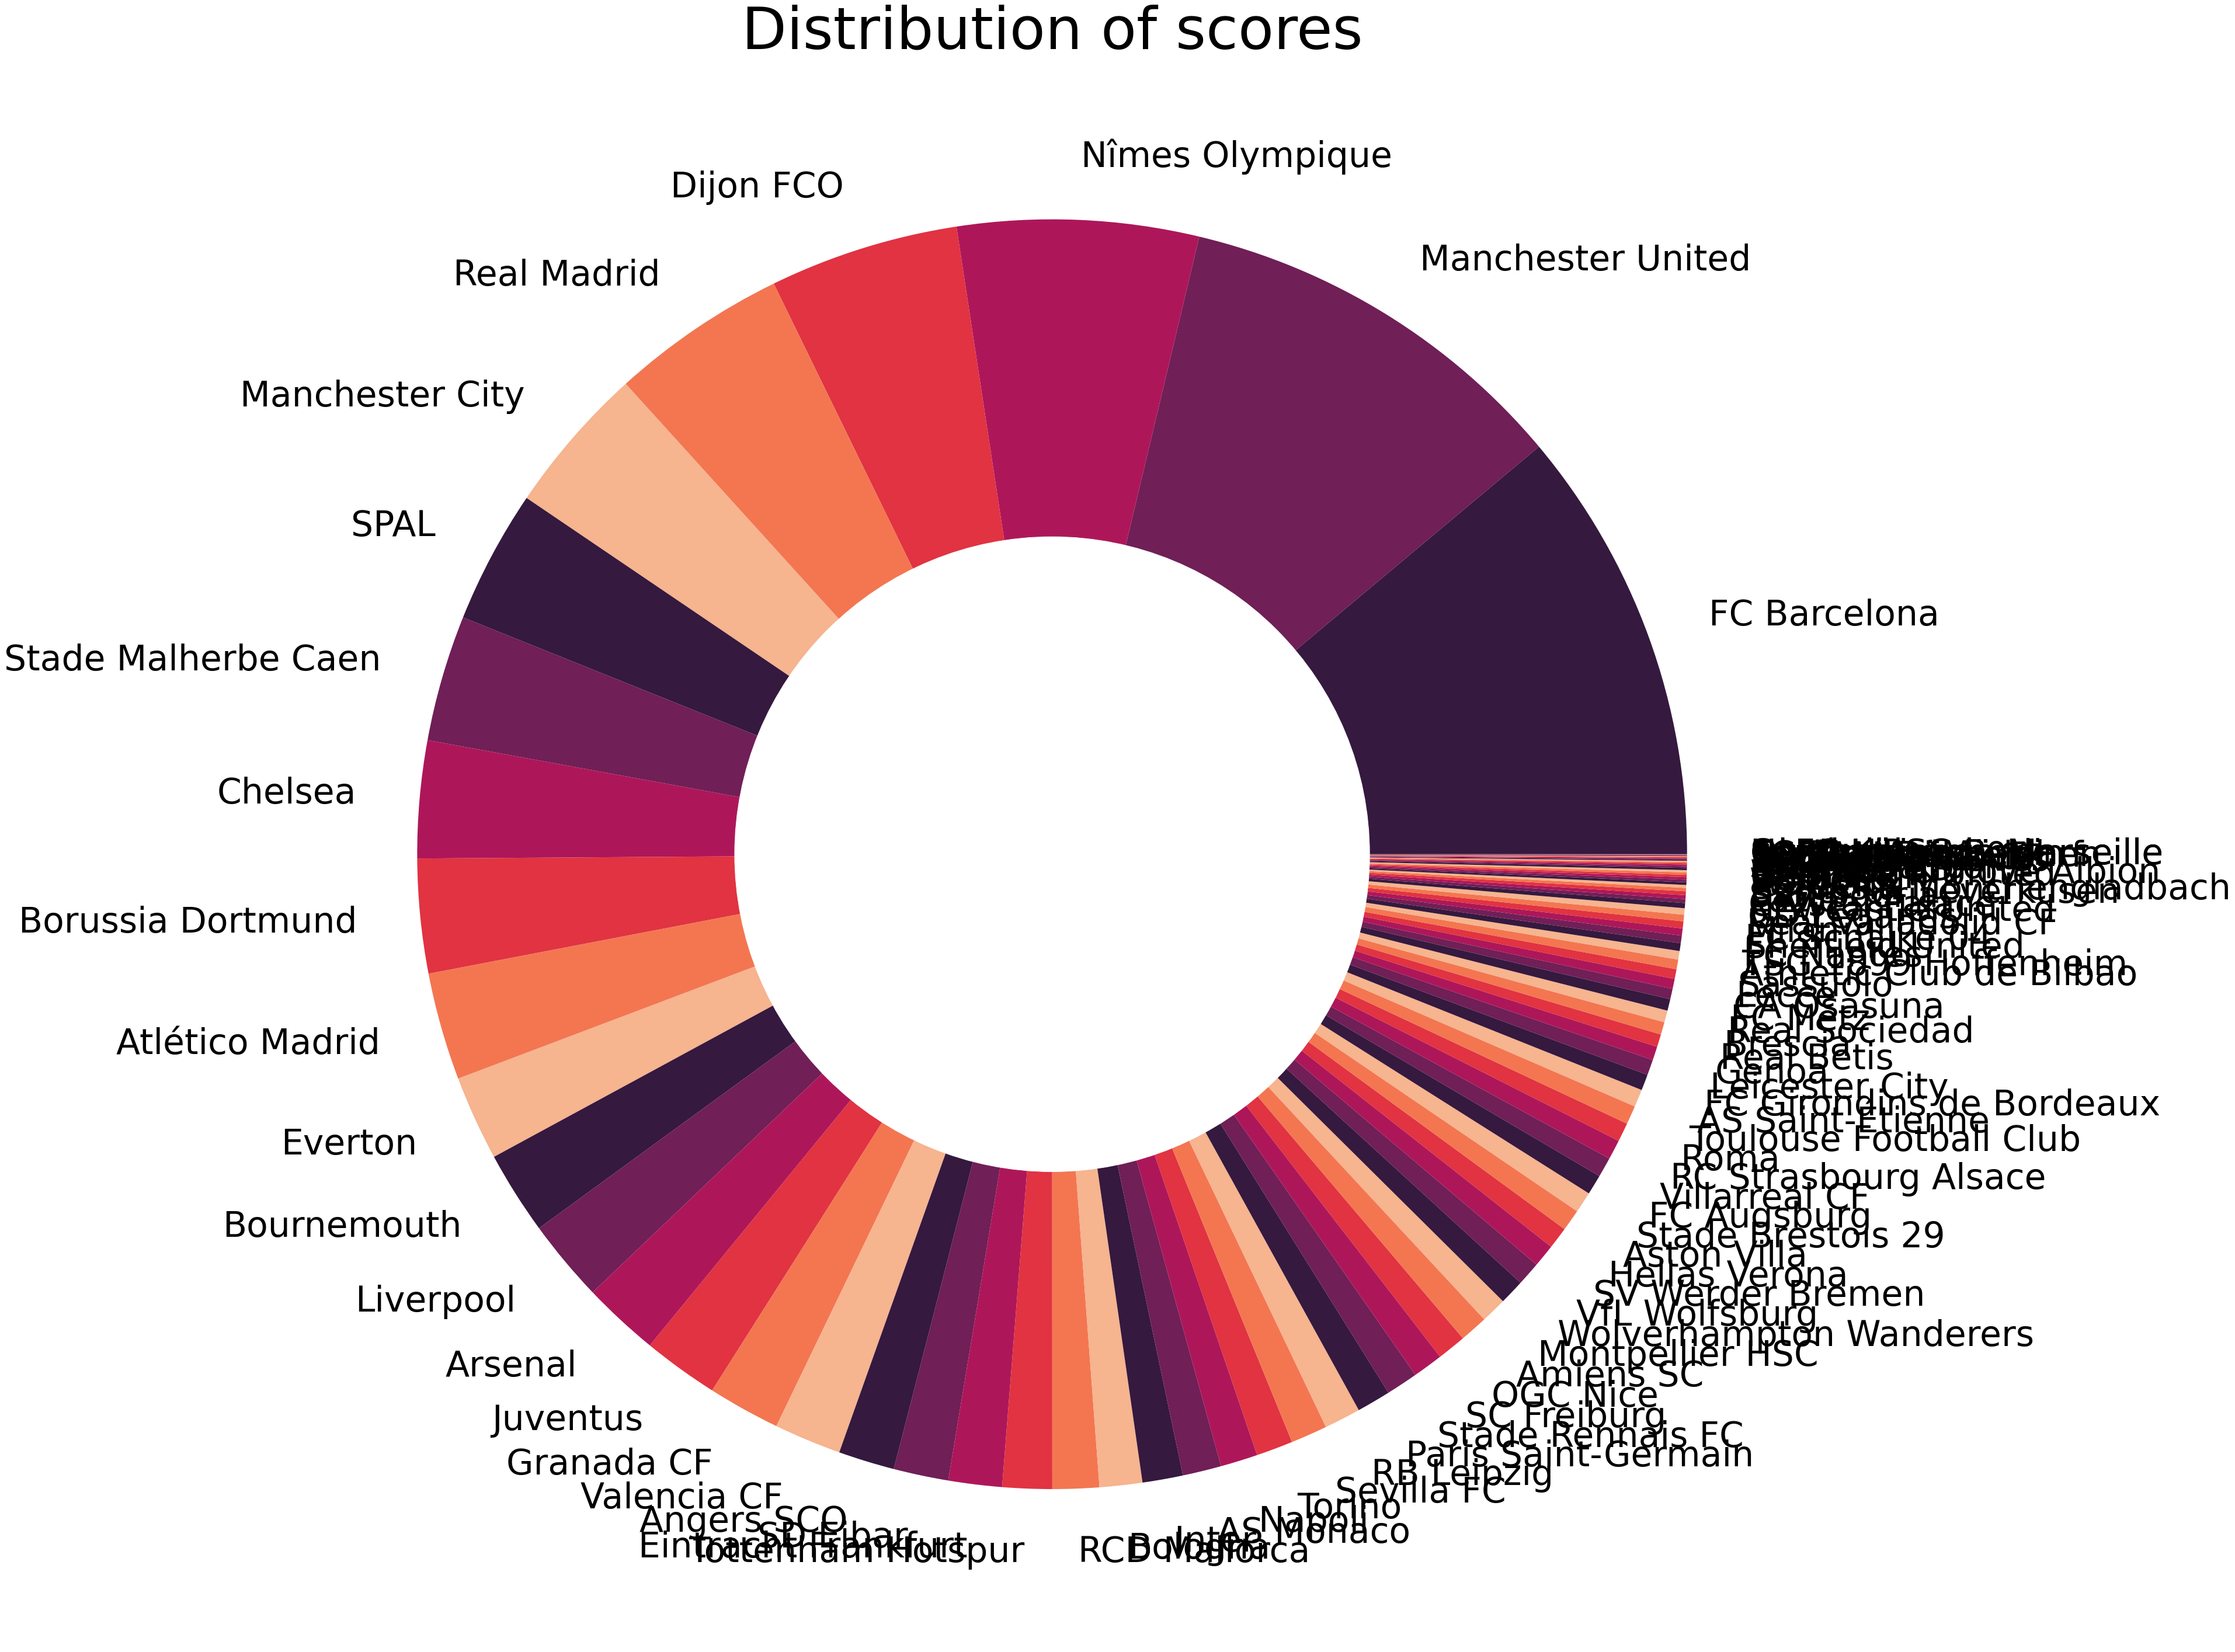

In [ ]:
my_circle=plt.Circle( (0,0), 0.5, color='white')
labels =[ i for i in df['club'].values]
sizes = df.score_per_cent.values
plt.figure(figsize=(50,50))
plt.pie(sizes, labels=labels,colors=sns.color_palette('rocket'), textprops={"fontsize":60})
p=plt.gcf()
p.gca().add_artist(my_circle)
#plt.legend(labels,loc='best')
plt.title('Distribution of scores',fontsize=100)
plt.show()


In [ ]:
colors = sns.color_palette('rocket')

Text(0.5, 1.0, 'Top 20 clubs as per predicted scores')

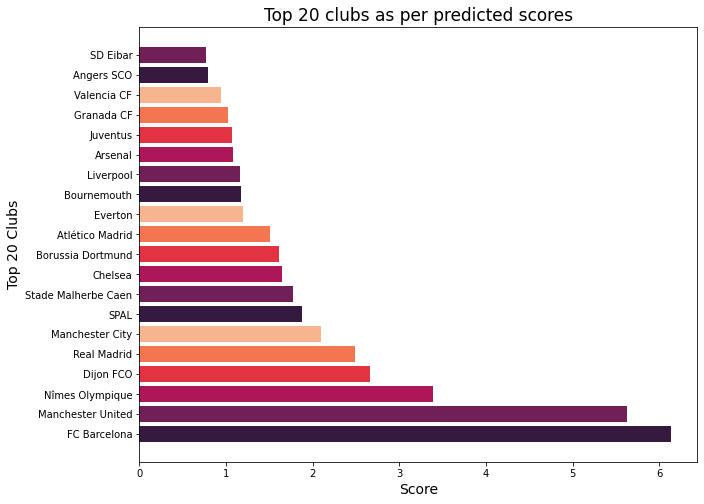

In [ ]:
#Plotting the scores for the top 20 clubs

df_top = df[0:20]
top_clubs = df_top['club'].values
plt.figure(figsize=(10,8))
plt.barh(df_top['club'],df_top['score'],color=colors)
plt.xlabel('Score',fontsize=14)
plt.ylabel('Top 20 Clubs',fontsize=14)
plt.title('Top 20 clubs as per predicted scores',fontsize=17)

<div style = "background: lightgreen ;color:black" class="alert alert-block alert-danger" >

<h3>FC Barcelona has the best staff, as per the analysis.</h3>

</div>